__11/12/2020__

Beatriz Cárdaba Rico

Sara Bengoechea Rodríguez

# LASSO

Lasso es un método de regularización que favorece que algunos de los coeficientes terminen valiendo 0. Esto quiere decir que el modelo va a ignorar algunas de las características predictivas, lo que puede ser considerado un tipo de selección automática de características. El incluir menos características supone un modelo más sencillo de interpretar que puede poner de manifiesto las características más importantes del conjunto de datos. En el caso de que exista cierta correlación entre las características predictivas, Lasso tenderá a escoger una de ellas al azar

__Importamos todas las librerías que se van a utilizar en este notebook:__

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing 
from sklearn.linear_model import Lasso, LassoCV
import pickle
import sweetviz as sv

Importamos los datos resultantes del notebook anterior, considerados como data_cleaned, ya que hemos realizado las labores de data engeneering necesarias.

In [2]:
path = ('../data/02_intermediate/data_cleaned.csv') # importamos los datos de la carpteta
data_cleaned = pd.read_csv(path)

In [3]:
data_cleaned.head() # visulalizamos la carga de los datos

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_housing,purpose_leisure,purpose_medical,purpose_other,application_type_Individual,application_type_Joint App
0,11575,11575,11575.0,359.26,153000.0,16.99,0,720,724,0,...,0,0,1,0,0,0,0,0,1,0
1,7200,7200,7200.0,285.70,50000.0,6.07,0,685,689,0,...,1,0,0,1,0,0,0,0,1,0
2,7500,7500,7500.0,232.79,110000.0,13.12,0,710,714,2,...,0,0,0,1,0,0,0,0,1,0
3,10000,10000,10000.0,243.29,51979.0,10.11,0,690,694,0,...,1,0,0,1,0,0,0,0,1,0
4,14000,14000,14000.0,492.34,75000.0,10.86,1,685,689,0,...,0,1,0,1,0,0,0,0,1,0


Nombramos y seleccionamos las variables predictoras y la variable target:

In [4]:

predictiveVariables = data_cleaned.loc[:, data_cleaned.columns != 'target'] #serán todas menos la varoables target

target = data_cleaned['target'] # es la variable 'target' de la bbdd importada

## Definimos el modelo LASSO:
Como este modelo va a ser utilizado para seleccionar aquellas variables más relevantes definimos que realice 500 iteraciones y cross validation, además lo realizará con toda la muestra ya que en este caso no será utilizado para futurass predicciones o clasificaciones

In [8]:
%%time
lassocv = LassoCV(alphas = None, # no predefinimos los alphas, queremos que los seleccione el propio modelo
                  cv = 10, # indicamos que el cross validation realice 10K
                  max_iter = 500, # número máximo de iteraciones = 500
                  normalize = True, # normalizamos las variables
                  random_state = 40) 

# entrenamos el modelo de cross validation con toda la muestra:
lassocv.fit(predictiveVariables, target ,)

# valores de alpha seleccionados por el modelo:
lassocv.alpha_


# definimos: lasso function, en el que el alpha será el calculado anteriormente
model_lasso = Lasso(alpha=lassocv.alpha_) 
# entrenamos el modelo lasso con toda la muestra
model_lasso.fit(predictiveVariables, target)

Wall time: 2min 7s


C:\Users\Beatriz\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19088.16316038026, tolerance: 8.72197076966072
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=4.453967939231418e-07)

Como se ha comentado anteriormente este modelo lo realizamos para conocer las variables más significativas del modelo. Por lo tanto, el objetivo es conocer los coeficientes resulates del modelo Lasso:

In [9]:
# coefficientes lasso de las variables predictoras:
lasso_coefficients = pd.DataFrame(model_lasso.coef_, set(predictiveVariables), columns = ['Coefficients'])

# término independiente del modelo Lasso
lasso_coefficients.loc['Intercept'] = model_lasso.intercept_
lasso_coefficients

# data frame de los coeficientes Lasso
df_lasso = pd.DataFrame(lasso_coefficients)

# ordenamos las variables en función de sus coeficientes
df_lasso_ordered = df_lasso.sort_values(by = "Coefficients")

In [10]:
pd.set_option("display.max_rows", None, "display.max_columns", None) # para que muestre todos los valores del df

print(df_lasso_ordered)

                                     Coefficients
tot_cur_bal                         -1.497574e-01
num_op_rev_tl                       -1.083935e-01
purpose_credit_card                 -1.025849e-01
acc_open_past_24mths                -1.622082e-02
verification_status_Source Verified -1.571544e-02
num_rev_accts                       -1.163515e-02
open_il_24m                         -1.101190e-02
mo_sin_rcnt_rev_tl_op               -6.912745e-03
delinq_2yrs                         -6.800552e-03
pct_tl_nvr_dlq                      -6.001731e-03
all_util                            -5.253575e-03
purpose_medical                     -4.217265e-03
pub_rec                             -3.646602e-03
tot_coll_amt                        -3.495827e-03
total_bc_limit                      -3.478830e-03
num_tl_30dpd                        -3.473543e-03
num_bc_sats                         -2.541076e-03
home_ownership_OWN                  -2.444897e-03
num_actv_bc_tl                      -2.132074e-03


Considerando el valor absoluto de los coeficientes, hemos determinado que seleccionaremos aquellas variables que su coeficientes sea > |0.001|.

In [11]:
# seleccionamos aquellas variables con coef >  |0.001|
important_variables = lasso_coefficients[(lasso_coefficients['Coefficients'] > 0.001) |
                                         (lasso_coefficients['Coefficients'] < -0.001)]

# visualizamos las variables  y los coeficientes que cumplen este requisito
lasso_coefficients_001 = important_variables.sort_values(['Coefficients'])
lasso_coefficients_001

,Coefficients
tot_cur_bal,-0.149757
num_op_rev_tl,-0.108393
purpose_credit_card,-0.102585
acc_open_past_24mths,-0.016221
verification_status_Source Verified,-0.015715
num_rev_accts,-0.011635
open_il_24m,-0.011012
mo_sin_rcnt_rev_tl_op,-0.006913
delinq_2yrs,-0.006801
pct_tl_nvr_dlq,-0.006002


In [12]:
lasso_coefficients_001.shape

(48, 1)

Vemos que aplicanto este criterio son 45 variables las resultantes, éstas serán las que utilicemos en los próximos modelos:

In [13]:
final_variables = list(lasso_coefficients_001.index) # seleccionamos las variables que cumple el criterio coef >|0.001|
final_variables

['tot_cur_bal',
 'num_op_rev_tl',
 'purpose_credit_card',
 'acc_open_past_24mths',
 'verification_status_Source Verified',
 'num_rev_accts',
 'open_il_24m',
 'mo_sin_rcnt_rev_tl_op',
 'delinq_2yrs',
 'pct_tl_nvr_dlq',
 'all_util',
 'purpose_medical',
 'pub_rec',
 'tot_coll_amt',
 'total_bc_limit',
 'num_tl_30dpd',
 'num_bc_sats',
 'home_ownership_OWN',
 'num_actv_bc_tl',
 'verification_status_Not Verified',
 'bc_util',
 'collection_recovery_fee',
 'total_rev_hi_lim',
 'purpose_debt_consolidation',
 'term_ 36 months',
 'open_rv_12m',
 'purpose_leisure',
 'max_bal_bc',
 'bc_open_to_buy',
 'open_il_12m',
 'mo_sin_rcnt_tl',
 'num_tl_op_past_12m',
 'application_type_Joint App',
 'num_bc_tl',
 'dti',
 'collections_12_mths_ex_med',
 'home_ownership_MORTGAGE',
 'total_acc',
 'percent_bc_gt_75',
 'verification_status_Verified',
 'funded_amnt',
 'tot_hi_cred_lim',
 'open_acc',
 'num_accts_ever_120_pd',
 'revol_bal',
 'inq_last_6mths',
 'avg_cur_bal',
 'Intercept']

Guardamos en un data frame los datos de las variables seleccionadas:

In [5]:
final_df = data_cleaned.loc[:, [ 'num_rev_accts',
                                 'open_acc_6m',
                                 'num_bc_tl',
                                 'home_ownership_ANY',
                                 'tot_hi_cred_lim',
                                 'home_ownership_MORTGAGE',
                                 'home_ownership_OWN',
                                 'purpose_leisure',
                                 'num_actv_bc_tl',
                                 'verification_status_Source Verified',
                                 'num_il_tl',
                                 'total_acc',
                                 'tax_liens',
                                 'delinq_amnt',
                                 'mo_sin_rcnt_rev_tl_op',
                                 'installment',
                                 'funded_amnt_inv',
                                 'purpose_debt_consolidation',
                                 'mo_sin_rcnt_tl',
                                 'bc_util',
                                 'total_bal_ex_mort',
                                 'mo_sin_old_il_acct',
                                 'inq_last_12m',
                                 'emp_length_> 10 years',
                                 'open_il_24m',
                                 'il_util',
                                 'fico_range_high',
                                 'max_bal_bc',
                                 'dti',
                                 'last_fico_range_high',
                                 'pub_rec',
                                 'emp_length_5-10 years',
                                 'application_type_Joint App',
                                 'open_act_il',
                                 'pub_rec_bankruptcies',
                                 'tot_coll_amt',
                                 'funded_amnt',
                                 'pct_tl_nvr_dlq',
                                 'inq_last_6mths',
                                 'loan_amnt',
                                 'bc_open_to_buy',
                                 'num_tl_30dpd',
                                 'num_op_rev_tl',
                                 'num_sats',
                                 'term_ 60 months',
                                 'open_acc',
                                 'total_rev_hi_lim',]]
final_df.head()

,num_rev_accts,open_acc_6m,num_bc_tl,home_ownership_ANY,tot_hi_cred_lim,home_ownership_MORTGAGE,home_ownership_OWN,purpose_leisure,num_actv_bc_tl,verification_status_Source Verified,...,pct_tl_nvr_dlq,inq_last_6mths,loan_amnt,bc_open_to_buy,num_tl_30dpd,num_op_rev_tl,num_sats,term_ 60 months,open_acc,total_rev_hi_lim
0,32.0,1.0,16,0,528172,0,1,0,6,0,...,95.7,0,11575,24269.0,0,16,20,0,20,37600
1,3.0,0.0,3,0,7600,0,0,0,2,1,...,80.0,0,7200,40.0,0,3,4,0,4,3600
2,15.0,1.0,13,0,350617,1,0,0,11,0,...,100.0,2,7500,60352.0,0,14,19,0,19,85700
3,17.0,1.0,8,0,34200,0,0,0,3,1,...,100.0,0,10000,14628.0,0,14,15,1,15,28700
4,6.0,1.0,5,0,170591,1,0,0,1,0,...,90.0,0,14000,300.0,0,1,4,0,4,3000


Index(['num_rev_accts', 'open_acc_6m', 'num_bc_tl', 'home_ownership_ANY',
       'tot_hi_cred_lim', 'home_ownership_MORTGAGE', 'home_ownership_OWN',
       'purpose_leisure', 'num_actv_bc_tl',
       'verification_status_Source Verified', 'num_il_tl', 'total_acc',
       'tax_liens', 'delinq_amnt', 'mo_sin_rcnt_rev_tl_op', 'installment',
       'funded_amnt_inv', 'purpose_debt_consolidation', 'mo_sin_rcnt_tl',
       'bc_util', 'total_bal_ex_mort', 'mo_sin_old_il_acct', 'inq_last_12m',
       'emp_length_> 10 years', 'open_il_24m', 'il_util', 'fico_range_high',
       'max_bal_bc', 'dti', 'last_fico_range_high', 'pub_rec',
       'emp_length_5-10 years', 'application_type_Joint App', 'open_act_il',
       'pub_rec_bankruptcies', 'tot_coll_amt', 'funded_amnt', 'pct_tl_nvr_dlq',
       'inq_last_6mths', 'loan_amnt', 'bc_open_to_buy', 'num_tl_30dpd',
       'num_op_rev_tl', 'num_sats', 'term_ 60 months', 'open_acc',
       'total_rev_hi_lim'],
      dtype='object')

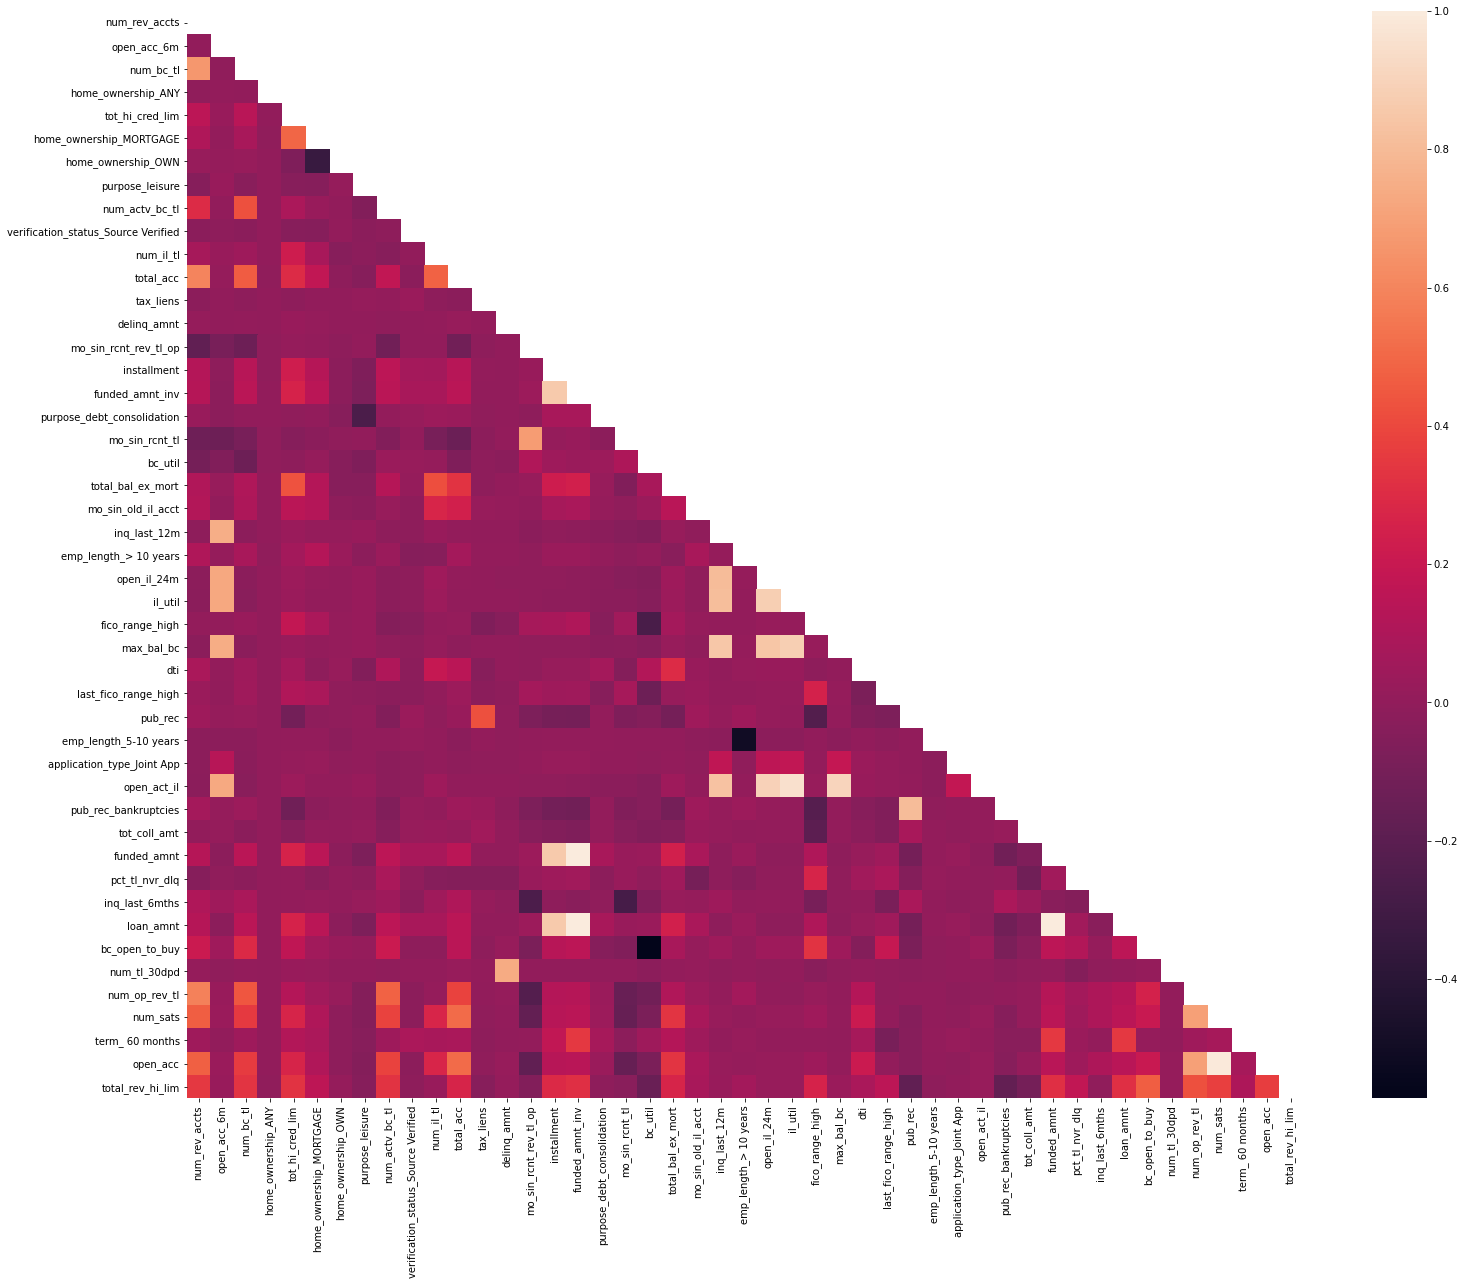

In [6]:
corr = final_df.corr(method='kendall')
plt.figure(figsize=(25,20))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True # Para que lo muestre triangular
sns.heatmap(corr, annot = False, mask = mask) # que muestre no los coeficientes
final_df.columns

A continuación eliminamos algunas de las variables que tienen alta correlación con otras ya incluidas en el dataset

In [7]:
del final_df['funded_amnt_inv']
del final_df['num_sats']

Añadimos la variable 'target' al df final que usaremos en nuestros modelos

In [8]:
final_df['target'] = data_cleaned['target'] # renombramos el df ya que va ser el final para nuestros modelos
final_df.head()

,num_rev_accts,open_acc_6m,num_bc_tl,home_ownership_ANY,tot_hi_cred_lim,home_ownership_MORTGAGE,home_ownership_OWN,purpose_leisure,num_actv_bc_tl,verification_status_Source Verified,...,pct_tl_nvr_dlq,inq_last_6mths,loan_amnt,bc_open_to_buy,num_tl_30dpd,num_op_rev_tl,term_ 60 months,open_acc,total_rev_hi_lim,target
0,32.0,1.0,16,0,528172,0,1,0,6,0,...,95.7,0,11575,24269.0,0,16,0,20,37600,0
1,3.0,0.0,3,0,7600,0,0,0,2,1,...,80.0,0,7200,40.0,0,3,0,4,3600,0
2,15.0,1.0,13,0,350617,1,0,0,11,0,...,100.0,2,7500,60352.0,0,14,0,19,85700,0
3,17.0,1.0,8,0,34200,0,0,0,3,1,...,100.0,0,10000,14628.0,0,14,1,15,28700,0
4,6.0,1.0,5,0,170591,1,0,0,1,0,...,90.0,0,14000,300.0,0,1,0,4,3000,0


#### Guardamos el modelo y los datos seleccionados:
 - Guardamos el modelo

In [18]:
def save_models(filename, model): # definimos una funcion para guardar los modelos 
    with open(filename, 'wb') as file:
        pickle.dump(model, file) # IMPORTANTE ARCHIVO PICKLE

In [19]:
save_models('../data/03_processed/model_lasso.pkl', model_lasso) 

 - Guardamos los datos seleccionados en un CSV para poder utilizarlo en los siguientes modelos

In [9]:
ruta = '../data/03_processed/final_df.csv' # ruta para guardar el csv

In [10]:
final_df.to_csv(ruta, index = False)

Por último hemos creado un reporte a modo resumen EDA de los datos que serán utilizados en los modelos

In [31]:
#analyzing the dataset
final_report = sv.analyze(final_df)
#display the report
final_report.show_html('../data/06_reporting/final_report.html')

Report ../data/06_reporting/final_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
